# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name=r'..\DDPG-Tennis-ContinuousControl\Tennis_Windows_x86_64\Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [10]:
#Hyperparameter tuning
######################

BUFFER_SIZE = int(5e5)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
START_LEARNING = 40
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
EPSILON_DECAY = 0.995
UPDATE_EVERY = 20
UPDATE_TIMES = 10
SEED = 23 
EPSILON = 1.0

MU = 0.
THETA = 0.175
SIGMA = 0.01


Episode 100	Average100 Score: 0.01	Score: 0.10	Buffer: 1812	Noise_mean: 0.0214	Eps: 1.0000
Episode 200	Average100 Score: 0.01	Score: 0.00	Buffer: 3621	Noise_mean: 0.0041	Eps: 1.0000
Episode 300	Average100 Score: 0.01	Score: 0.00	Buffer: 5549	Noise_mean: 0.0214	Eps: 1.0000
Episode 400	Average100 Score: 0.00	Score: 0.00	Buffer: 7392	Noise_mean: 0.0310	Eps: 1.0000
Episode 500	Average100 Score: 0.00	Score: 0.00	Buffer: 9146	Noise_mean: 0.0158	Eps: 1.0000
Episode 600	Average100 Score: 0.01	Score: 0.00	Buffer: 10851	Noise_mean: 0.0233	Eps: 0.2223
Episode 700	Average100 Score: 0.01	Score: 0.00	Buffer: 12507	Noise_mean: 0.0167	Eps: 0.0035
Episode 800	Average100 Score: 0.00	Score: 0.00	Buffer: 14021	Noise_mean: 0.0026	Eps: 0.0010
Episode 900	Average100 Score: 0.00	Score: 0.00	Buffer: 15491	Noise_mean: 0.0215	Eps: 0.0010
Episode 1000	Average100 Score: 0.02	Score: 0.10	Buffer: 17169	Noise_mean: 0.0221	Eps: 0.0010
Episode 1100	Average100 Score: 0.06	Score: 0.00	Buffer: 19685	Noise_mean: 0.0158	Eps

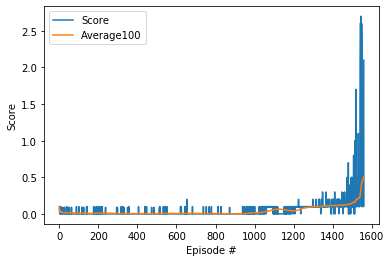

In [11]:
#Training Agent
def ddpg(agent, n_episodes=10000):
    scores_deque = deque(maxlen=100)
    episode_score = 0
    all_scores = []
    max_score = -np.Inf
    scores = np.zeros(num_agents)
    
    all_eps = []
    all_noise_mean = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        #agent.reset()
        score = 0
        scores = np.zeros(num_agents)
        while True:
            action = agent.act(state, add_noise = True)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations        
            reward = env_info.rewards
            done = env_info.local_done  
            agent.step(state, action, [[reward[0]],[reward[1]]], next_state, [[done[0]],[done[1]]])
            state = next_state
            scores += reward
           
            if np.any(done):                                  
                break
        eps = agent.get_epsilon()
        noise_mean = agent.get_noise_mean()
        all_eps.append(eps)
        all_noise_mean.append(noise_mean)
        
        episode_score = np.max(scores)
        scores_deque.append(episode_score)
        all_scores.append(episode_score)
        score100 = np.mean(scores_deque)
        #print ("Score: {} \t Reward: {} \tscore100: {}".format(scores, reward,score100))
        l_buff = len(agent.RepMem)
        print('\rEpisode {}\tAverage100 Score: {:.2f}\tScore: {:.2f}\tBuffer: {}\tNoise_mean: {:.4f}\tEps: {:.4f}'.format(i_episode,score100,episode_score,l_buff,noise_mean,eps) , end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage100 Score: {:.2f}'.format(i_episode, score100))
        if score100 > 0.5:
            print('\rEpisode {}\tAverage100 Score: {:.2f}\tScore: {:.2f}\tBuffer: {}\tNoise_mean: {:.4f}\tEps: {:.4f}'.format(i_episode,score100,episode_score,l_buff,noise_mean,eps))
            print ('Environment solved! \tAverage100 Score: {:.2f}\tEpisodes: {}'.format(score100,i_episode))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return all_scores, all_eps, all_noise_mean

James = Agent(state_size, action_size, BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY, EPSILON, EPSILON_DECAY, UPDATE_EVERY, UPDATE_TIMES,START_LEARNING, SEED, MU, THETA, SIGMA)
all_scores, all_eps, all_noise_mean = ddpg(James)

scores_deque = deque(maxlen=100)
av100_score = []

for score in all_scores:
    scores_deque.append(score)
    av100_score.append(np.mean(scores_deque))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(all_scores)+1), all_scores)
plt.plot(np.arange(1, len(av100_score)+1), av100_score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(['Score','Average100'],loc='upper left')
plt.show()

In [12]:
import pickle

# An arbitrary collection of objects supported by pickle.
data = {
    'scores': all_scores,
    'eps': all_eps,
    'noise': all_noise_mean
}

with open('data#.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [13]:
env.close()